<ipython-input-17-1501f1c2c90c>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=train.drop('Item_Outlet_Sales', 1)


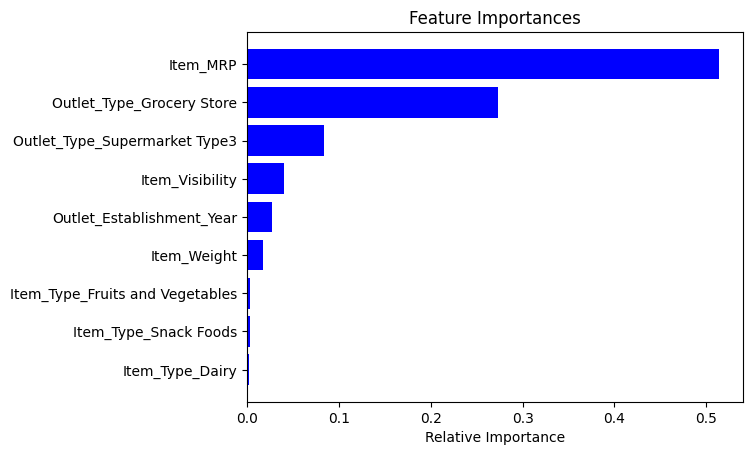

In [17]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

# read the data
train=pd.read_csv("Train_UWu5bXk.csv")

# Note: The path of the file should be added while reading the data.





train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

# We will drop the dependent variable (Item_Outlet_Sales) first and save the remaining variables in a new dataframe (df).
df=train.drop('Item_Outlet_Sales', 1)

# We need to convert the data into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs.
# Let’s also drop the ID variables (Item_Identifier and Outlet_Identifier) as these are just unique numbers and hold no significant importance for us currently.



from sklearn.ensemble import RandomForestRegressor

df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.Item_Outlet_Sales)

#After fitting the model, plot the feature importance graph:

features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# this graph below showns which variables are important and which are not
